# Loading Original Data

In [1]:
import numpy as np 
import matplotlib.pyplot as plt # to visualize only 
import pandas as pd
import gc

In [2]:
original_x = pd.read_csv("./data/train_x.csv", delimiter=",", header = None) # load from text 

In [3]:
y = pd.read_csv("./data/train_y.csv", delimiter = ",", header = None)

In [4]:
#have to reformat from data frame 

original_x = original_x.values

In [5]:
y = (y.values).ravel()

In [6]:
original_x = original_x.astype(np.float32)

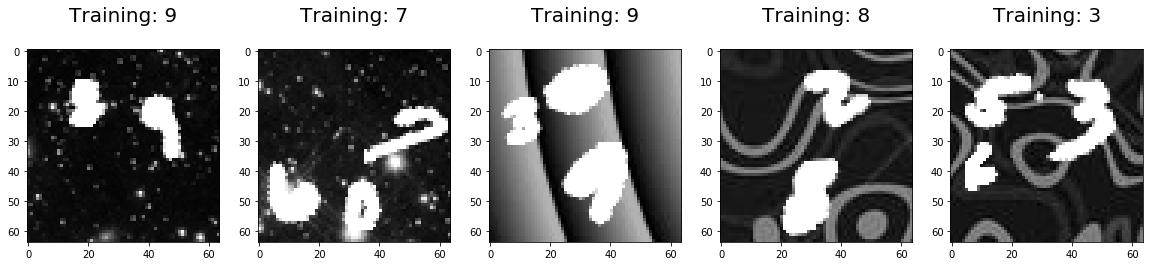

In [24]:
#visualizing a random 5 images

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(original_x[20:25], y[20:25])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (64,64)), cmap= 'gray')
    plt.title('Training: %i\n' % label, fontsize = 20)

### Processing the data

In [18]:
#this will make any 'dark' pixel black and any 'light' pixel white
#basically will make the background black and the digits white

def binarize_element(x, threshold = 250):
    #make this less than to get black digits and white background
    if x > threshold:
        x = 255
        return x
    else:
        x = 0
        return x

In [19]:
def array_map(x):
    return map(binarize_element, x)

In [20]:
#making the data black and white

new_x = np.zeros((original_x.shape[0], original_x.shape[1]))
for i in range(len(new_x)):
    new_x[i] = list(array_map(original_x[i]))

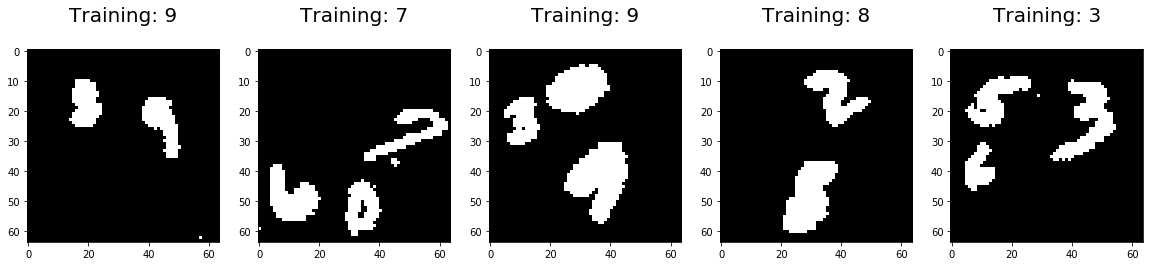

In [23]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(new_x[20:25], y[20:25])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (64,64)), cmap= 'gray')
    plt.title('Training: %i\n' % label, fontsize = 20)

In [25]:
import pandas as pd 
df = pd.DataFrame(new_x)

In [26]:
#writing the black and white images to a file

df.to_csv("./data/bw_x.csv", header = False, index = False)

In [32]:
import numpy as np 
import matplotlib.pyplot as plt # to visualize only 
import pandas as pd
import gc

In [33]:
#going to be doing more preprocessing on the black and white images

x = pd.read_csv("./data/bw_x.csv", delimiter=",", header = None) # load from processed images

In [34]:
x = x.values

In [35]:
x = x.astype(np.float32)

In [ ]:
#x /= 255

In [ ]:
y = pd.read_csv("./data/train_y.csv", delimiter = ",", header = None)
y = (y.values).ravel()

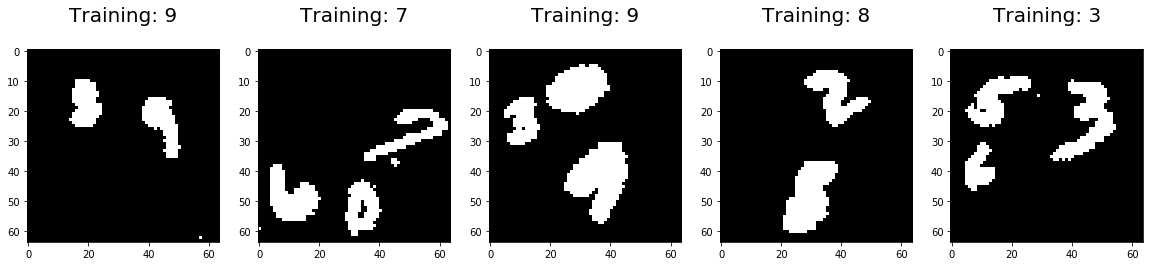

In [37]:
#making sure the background is indeed black and the digits are white

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(x[20:25], y[20:25])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (64,64)), cmap = 'gray')
    plt.title('Training: %i\n' % label, fontsize = 20)

### Perfecting getting the largest digit

In [125]:
im = np.reshape(x[20], (64,64))

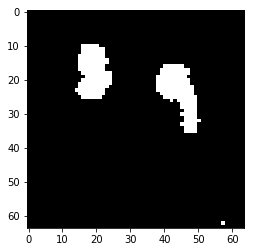

In [126]:
plt.imshow(im, cmap = 'gray')

In [233]:
from scipy import ndimage

def find_biggest_digit(im):
    im = np.reshape(im, (64,64))
    # Label objects
    labeled_image, num_features = ndimage.label(im)
    # Find the location of all objects
    objs = ndimage.find_objects(labeled_image)
    # Get the height and width
    measurements = []
    for ob in objs:
        measurements.append((int(ob[0].stop - ob[0].start), int(ob[1].stop - ob[1].start)))

    index = max(enumerate(measurements), key=lambda x: max(x[1]))[0]

    min_y, max_y = objs[index][0].start, objs[index][0].stop
    min_x, max_x = objs[index][1].start, objs[index][1].stop
    
    if(min_y > 1):
        min_y -= 2
    if(max_y < 63):
        max_y += 2
    if(min_x > 1):
        min_x -= 2
    if(max_x < 63):
        max_x += 2

    image = im[min_y:max_y,min_x:max_x]
    return image

In [241]:
new_x = find_biggest_digit(x[23])

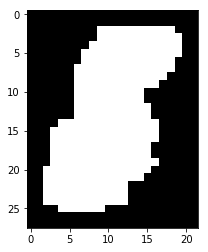

In [242]:
plt.imshow(new_x, cmap = 'gray')


## Getting the largest digit in area from images

In [ ]:
import cv2
from skimage import measure

In [ ]:
new_x = np.zeros((x.shape[0], x.shape[1]))

In [ ]:
for i in range(len(x)):
    im = np.reshape(x[i], (64,64))

    #get rid of small white bits that aren't part of digits, 
    #this messed up the image too much, going to work more on it
    #im = cv2.erode(im, None, iterations=1)
    #im = cv2.dilate(im, None, iterations=1)
    
    # perform a connected component analysis on the thresholded
    # image, then initialize a mask to store only the "large"
    # components
    labels = measure.label(im, neighbors=8, background=0)
    mask = np.zeros(im.shape, dtype="uint8")
    
    #dictionary: key-number of pixel, value-digit in the image that takes up that number of pixels
    masks = {}

    # loop over the unique components
    for label in np.unique(labels):
        # if this is the background label, ignore it
        if label == 0:
            continue

        # otherwise, construct the label mask and count the
        # number of pixels 
        labelMask = np.zeros(im.shape, dtype="uint8")
        labelMask[labels == label] = 255
        numPixels = cv2.countNonZero(labelMask)
        masks[numPixels] = labelMask

    try:
        mask = cv2.add(mask, masks[max(masks, key = int)])
        foo = mask.reshape(4096)
        new_x[i] = foo
    except:
        new_x[i] = x[i]

Comparing the original images, the black and white, and the fully processed

In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(original_x[3140:3145], y[3140:3145])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (64,64)), cmap= 'gray')
    plt.title('Training: %i\n' % label, fontsize = 20)

In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(x[3140:3145], y[3140:3145])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (64,64)), cmap = 'gray')
    plt.title('Training: %i\n' % label, fontsize = 20)

In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(new_x[3140:3145], y[3140:3145])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (64,64)), cmap = 'gray')
    plt.title('Training: %i\n' % label, fontsize = 20)

In [ ]:
#better to make the digits black and the background white

def invert_element(x):
    #make this less than to get black digits and white background
    if x == 0:
        x = 255
        return x
    else:
        x = 0
        return x

In [ ]:
def invert_map(x):
    return map(invert_element, x)

In [ ]:
processed_x = np.zeros((new_x.shape[0],new_x.shape[1]))
for i in range(len(processed_x)):
    processed_x[i] = list(invert_map(new_x[i]))

In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(processed_x[3140:3145], y[3140:3145])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (64,64)), cmap = 'gray')
    plt.title('Training: %i\n' % label, fontsize = 20)

In [ ]:
import pandas as pd 
df = pd.DataFrame(processed_x)

In [ ]:
df.to_csv("./data/processed_x.csv", header = False, index = False)

# Can start from here

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt # to visualize only 
import pandas as pd
import gc

In [ ]:
x = pd.read_csv("./data/processed_x.csv", delimiter=",", header = None) # load from processed images

In [ ]:
x = x.values

In [ ]:
y = pd.read_csv("./data/train_y.csv", delimiter = ",", header = None)
y = (y.values).ravel()

In [ ]:
x = x.astype(np.float32)
x /= 255

In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(x[0:5], y[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (64,64)), cmap = 'gray')
    plt.title('Training: %i\n' % label, fontsize = 20)

#### Scaling and Augmentation

Can see from this that my preprocessing doesn't always lead to extracting the right number, going to work on it more

## Logistic Regression with Processed Data

In [ ]:
#splitting the data into random training and validation set, right now using 1/10 as validation (5000 instances)
#this is splitting the non-processed images

np.random.seed(100)
from sklearn.model_selection import train_test_split
og_train_x, og_valid_x, og_train_y, og_valid_y = train_test_split(
    original_x, y, test_size=1/10.0, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

#this solver is faster according to sklearn documentation, not the default
clf = LogisticRegression(solver = 'lbfgs')

In [ ]:
#training logistic regression on original dataset

clf.fit(og_train_x, og_train_y)

In [ ]:
#predict on validation
og_predictions = clf.predict(og_valid_x)

In [ ]:
og_corr = 0

for i, pred in enumerate(og_predictions):
    if pred == og_valid_y[i]:
        og_corr += 1

og_acc = og_corr/len(og_valid_y)
print("Accuracy: " + str(og_acc))

In [ ]:
#splitting the data into random training and validation set, right now using 1/10 as validation (5000 instances)
#this is splitting the processed data

np.random.seed(100)
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(
    x, y, test_size=1/10.0, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [ ]:
logisticRegr.fit(train_x, train_y)

In [ ]:
#predict on validation
predictions = logisticRegr.predict(valid_x)

In [ ]:
corr = 0

for i, pred in enumerate(predictions):
    if pred == valid_y[i]:
        corr += 1

acc = corr/len(valid_y)
print("Accuracy: " + str(acc))

Preprocessing led to a ~7% increase in accuracy (training and validation sets were identical between the two different trainings)

In [ ]:
#getting all of the misclassified instances

index = 0
misclassifiedIndexes = []
for label, predict in zip(valid_y, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

In [ ]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[10:15]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(valid_x[badIndex], (64,64)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], valid_y[badIndex]), fontsize = 15)